In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | muromtsevo
Processing Record 6 of Set 1 | kiruna
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | thunder bay
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | malinalco
Processing Record 15 of Set 1 | davila
Processing Record 16 of Set 1 | kirakira
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | kuche
City not found. Skipping...
Processing Record 19 of Set 1 | namatanai
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Se

Processing Record 38 of Set 4 | clyde river
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 41 of Set 4 | tabas
Processing Record 42 of Set 4 | genhe
Processing Record 43 of Set 4 | urbano santos
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | sitio novo do tocantins
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | nakhon phanom
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | lulea
Processing Record 50 of Set 4 | pasvalys
Processing Record 1 of Set 5 | gorey
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | krasnodon
Processing Record 4 of Set 5 | port lincoln
Processing Record 5 of Set 5 | havelock
Processing Record 6 of Set 5 | shitanjing
Processing Record 7 of Set 5 | ijaki
City not found. Skipping...
Processing Record 8 of Set 5 | quirinopolis
Processing Record 9 of Set 5 | sarai naurang
Processing Recor

Processing Record 29 of Set 8 | nelson bay
Processing Record 30 of Set 8 | umea
Processing Record 31 of Set 8 | tahta
Processing Record 32 of Set 8 | pimentel
Processing Record 33 of Set 8 | buala
Processing Record 34 of Set 8 | warqla
City not found. Skipping...
Processing Record 35 of Set 8 | kathu
Processing Record 36 of Set 8 | nadym
Processing Record 37 of Set 8 | komsomolskiy
Processing Record 38 of Set 8 | dengzhou
Processing Record 39 of Set 8 | mundo nuevo
Processing Record 40 of Set 8 | severo-kurilsk
Processing Record 41 of Set 8 | solnechnyy
Processing Record 42 of Set 8 | umm kaddadah
Processing Record 43 of Set 8 | haines junction
Processing Record 44 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 8 | trairi
Processing Record 46 of Set 8 | tigil
Processing Record 47 of Set 8 | puerto carreno
Processing Record 48 of Set 8 | waingapu
Processing Record 49 of Set 8 | pampa
Processing Record 50 of Set 8 | tsiroanomandidy
Processing Record 1 of Set 

Processing Record 12 of Set 12 | praia da vitoria
Processing Record 13 of Set 12 | tafresh
Processing Record 14 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 15 of Set 12 | goderich
Processing Record 16 of Set 12 | ziro
Processing Record 17 of Set 12 | lufilufi
Processing Record 18 of Set 12 | twentynine palms
Processing Record 19 of Set 12 | diu
Processing Record 20 of Set 12 | grande riviere du nord
Processing Record 21 of Set 12 | talawdi
City not found. Skipping...
Processing Record 22 of Set 12 | maceio
Processing Record 23 of Set 12 | yar-sale
Processing Record 24 of Set 12 | bathsheba
Processing Record 25 of Set 12 | venice
Processing Record 26 of Set 12 | beidao
Processing Record 27 of Set 12 | baruun-urt
Processing Record 28 of Set 12 | mathbaria
Processing Record 29 of Set 12 | katangli
Processing Record 30 of Set 12 | bambanglipuro
Processing Record 31 of Set 12 | port hedland
Processing Record 32 of Set 12 | sao geraldo do araguaia
Processing Record 33 

In [14]:
len(city_data)

561

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,50.00,72,1,1.99,ZA,2020-07-11 21:35:10
1,Aklavik,68.22,-135.01,57.20,50,40,5.82,CA,2020-07-11 21:35:10
2,Puerto Ayora,-0.74,-90.35,66.99,95,82,7.00,EC,2020-07-11 21:34:14
3,Muromtsevo,56.37,75.24,61.77,85,97,6.46,RU,2020-07-11 21:35:10
4,Kiruna,67.86,20.23,46.40,93,100,3.36,SE,2020-07-11 21:35:11
5,Hobart,-42.88,147.33,46.00,93,75,5.82,AU,2020-07-11 21:31:54
6,Thunder Bay,48.40,-89.32,73.40,56,75,10.29,CA,2020-07-11 21:34:20
7,Tuktoyaktuk,69.45,-133.04,48.20,76,20,9.17,CA,2020-07-11 21:35:11
8,Punta Arenas,-53.15,-70.92,35.60,69,40,10.29,CL,2020-07-11 21:35:01
9,New Norfolk,-42.78,147.06,45.00,92,50,1.28,AU,2020-07-11 21:35:11


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-07-11 21:35:10,-34.42,19.23,50.00,72,1,1.99
1,Aklavik,CA,2020-07-11 21:35:10,68.22,-135.01,57.20,50,40,5.82
2,Puerto Ayora,EC,2020-07-11 21:34:14,-0.74,-90.35,66.99,95,82,7.00
3,Muromtsevo,RU,2020-07-11 21:35:10,56.37,75.24,61.77,85,97,6.46
4,Kiruna,SE,2020-07-11 21:35:11,67.86,20.23,46.40,93,100,3.36
...,...,...,...,...,...,...,...,...,...
556,Colares,PT,2020-07-11 21:37:09,38.80,-9.45,71.01,72,20,17.22
557,Namibe,AO,2020-07-11 21:37:09,-15.20,12.15,64.99,58,0,9.06
558,Baran,IN,2020-07-11 21:37:10,25.10,76.52,84.27,73,99,13.47
559,Kumluca,TR,2020-07-11 21:37:10,36.37,30.29,83.89,43,0,1.90


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

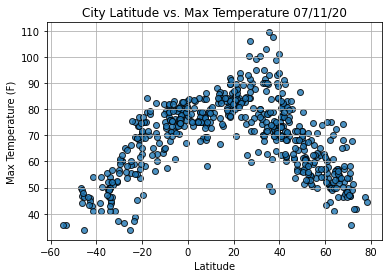

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

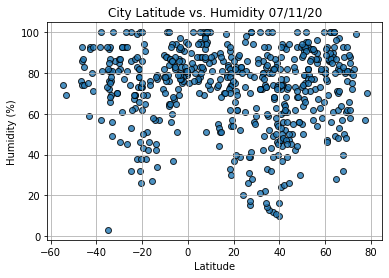

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

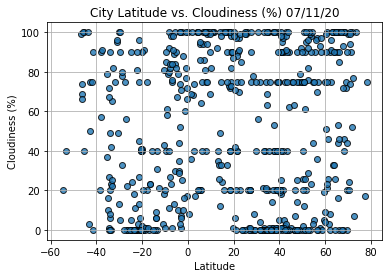

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

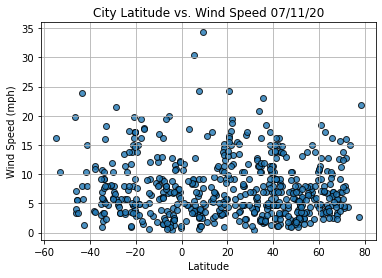

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

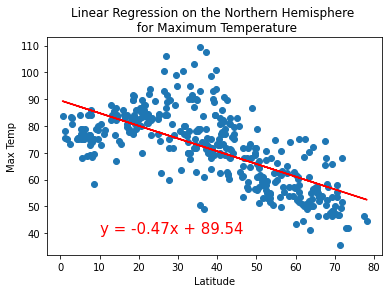

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

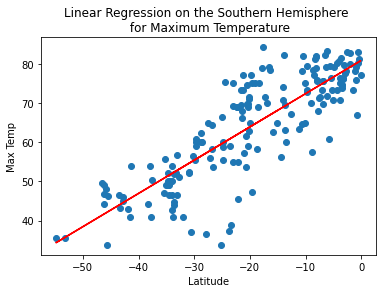

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

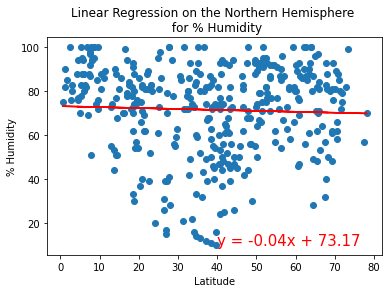

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

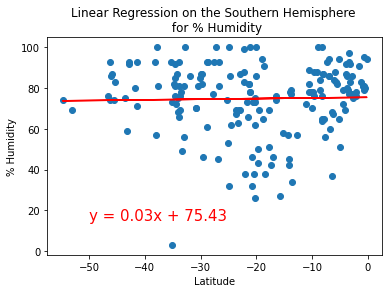

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

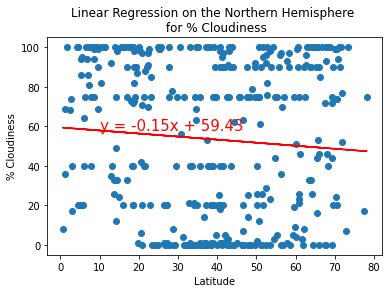

In [42]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,58))

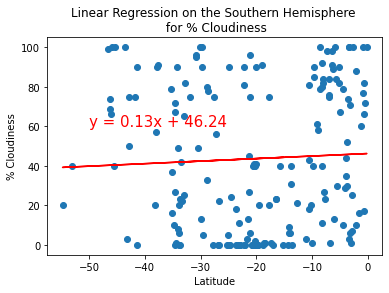

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

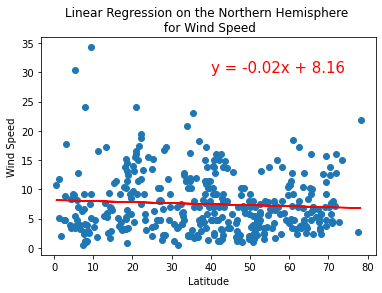

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

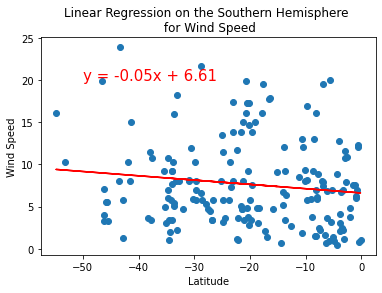

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))